## CART - RF - ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df_ins = pd.read_csv("insurance_part2_data.csv")

In [3]:
df_ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df_ins.shape

(3000, 10)

In [5]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df_ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [7]:
df_ins.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
duplicate = df_ins.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 139


In [8]:
df_ins.drop_duplicates(inplace=True)

In [10]:
duplicate = df_ins.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
print(df_ins.shape)

Number of duplicate rows = 0
(2861, 10)


<AxesSubplot:>

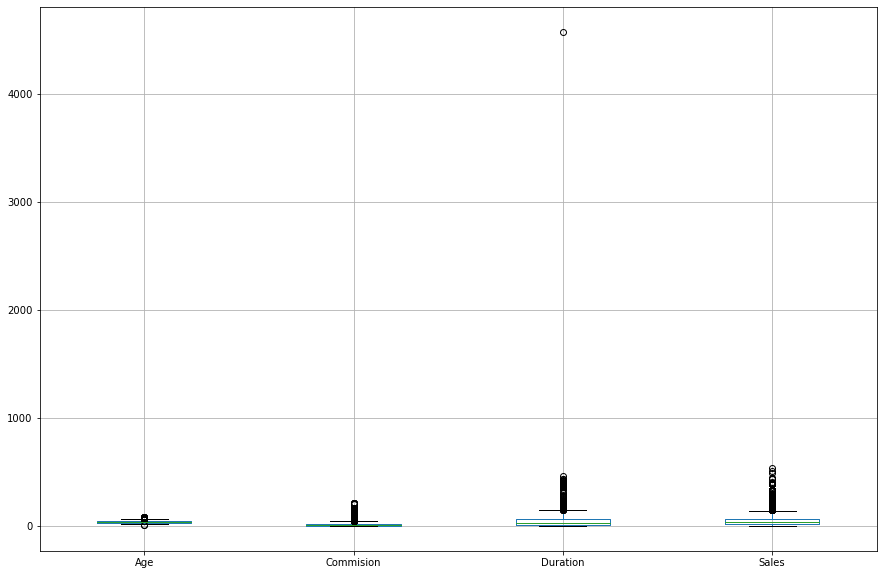

In [13]:
plt.figure(figsize=(15,10))
df_ins[['Age','Commision', 'Duration', 'Sales']].boxplot(vert=1)

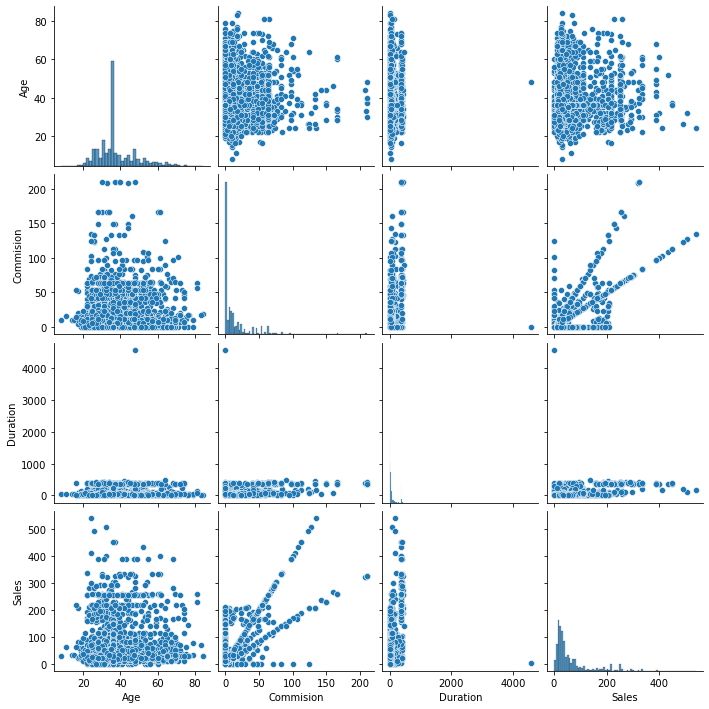

In [14]:
sns.pairplot(df_ins[['Age','Commision', 'Duration', 'Sales']])

<AxesSubplot:>

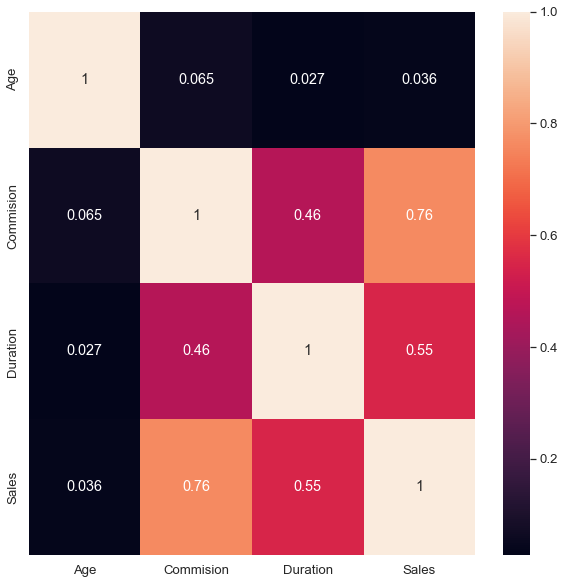

In [15]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(df_ins[['Age','Commision', 'Duration', 'Sales']].corr(), annot=True)

In [16]:
for feature in df_ins.columns: 
    if df_ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_ins[feature].unique()))
        print(pd.Categorical(df_ins[feature].unique()).codes)
        df_ins[feature] = pd.Categorical(df_ins[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [17]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [18]:
df_ins.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [19]:
df_ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Extracting the target column into separate vectors for training set and test set

In [20]:
X = df_ins.drop("Claimed", axis=1)

y = df_ins.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [21]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [22]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


### Building a Decision Tree Classifier

In [23]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [24]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [25]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

### Variable Importance

In [26]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], 
        index = X_train.columns).sort_values('Imp',ascending=False))


                   Imp
Duration      0.260870
Sales         0.226807
Age           0.192922
Agency_Code   0.172195
Commision     0.075433
Product Name  0.035137
Destination   0.031957
Channel       0.003908
Type          0.000772


### Predicting Test Data

In [27]:
y_predict = dt_model.predict(X_test)

In [28]:
y_predict.shape

(859,)

# Regularising the Decision Tree

### Adding Tuning Parameters

In [29]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

### Generating New Tree

In [30]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [31]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.816288
Sales         0.119333
Product Name  0.064379
Age           0.000000
Type          0.000000
Commision     0.000000
Channel       0.000000
Duration      0.000000
Destination   0.000000


### Predicting on Training and Test dataset

In [32]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [33]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2002,)
ytest_predict (859,)


### Getting the Predicted Classes

In [34]:
ytest_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,

### Getting the Predicted Probabilities

In [35]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.57317073, 0.42682927],
       [0.91258741, 0.08741259],
       [0.4064915 , 0.5935085 ],
       ...,
       [0.4064915 , 0.5935085 ],
       [0.77544426, 0.22455574],
       [0.77544426, 0.22455574]])

In [36]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.912587,0.087413
2,0.406491,0.593509
3,0.775444,0.224556
4,0.775444,0.224556


# Model Evaluation

## Measuring AUC-ROC Curve

In [37]:
import matplotlib.pyplot as plt

### AUC and ROC for the training data

AUC: 0.760


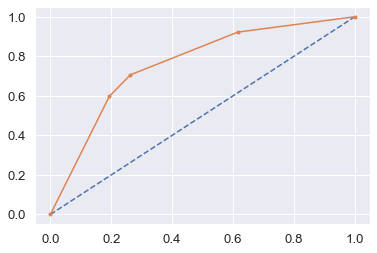

In [38]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.784


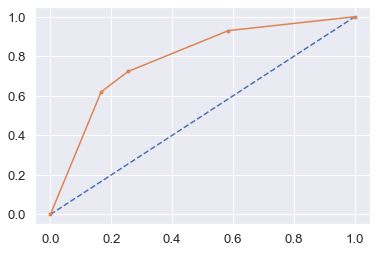

In [39]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
confusion_matrix(train_labels, ytrain_predict)

array([[1096,  263],
       [ 259,  384]], dtype=int64)

In [42]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7392607392607392

In [43]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1359
           1       0.59      0.60      0.60       643

    accuracy                           0.74      2002
   macro avg       0.70      0.70      0.70      2002
weighted avg       0.74      0.74      0.74      2002



## Confusion Matrix for test data

In [44]:
confusion_matrix(test_labels, ytest_predict)

array([[490,  98],
       [103, 168]], dtype=int64)

In [45]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.7660069848661234

In [46]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       588
           1       0.63      0.62      0.63       271

    accuracy                           0.77       859
   macro avg       0.73      0.73      0.73       859
weighted avg       0.76      0.77      0.77       859



# Ensemble RandomForest Classifier

In [48]:
df_insured_rf = df_ins.copy()
df_insured_rf.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Treating Outliers for Random Forest

In [49]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [50]:
for feature in df_insured_rf[['Age','Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(df_insured_rf[feature])
    df_insured_rf[feature]=np.where(df_insured_rf[feature]>ur,ur,df_insured_rf[feature])
    df_insured_rf[feature]=np.where(df_insured_rf[feature]<lr,lr,df_insured_rf[feature])

<AxesSubplot:>

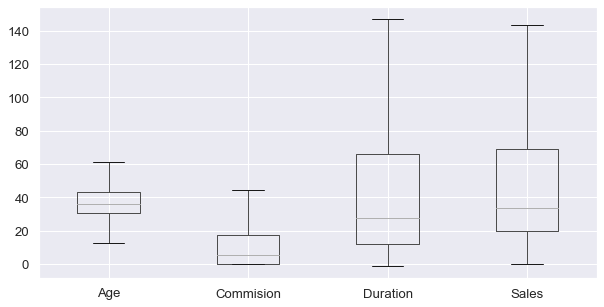

In [51]:
plt.figure(figsize=(10,5))
df_insured_rf[['Age','Commision', 'Duration', 'Sales']].boxplot()

In [52]:
rfcl = RandomForestClassifier(n_estimators = 100, max_features=6, random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [53]:
rfcl

RandomForestClassifier(max_features=6, random_state=1)

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [6],
    'max_features': [4],
    'min_samples_leaf': [8],
    'min_samples_split': [45],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)


In [55]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6], 'max_features': [4],
                         'min_samples_leaf': [8], 'min_samples_split': [45],
                         'n_estimators': [100]})

In [56]:
best_grid = grid_search.best_estimator_

##### Predicting Train and Test data with the RF Model

In [57]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Model Evaluation

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

## Confusion Matrix for the training data

In [59]:
confusion_matrix(train_labels,ytrain_predict)

array([[1213,  146],
       [ 264,  379]], dtype=int64)

In [60]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1359
           1       0.72      0.59      0.65       643

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



## Confusion Matrix for the test data

In [61]:
confusion_matrix(test_labels,ytest_predict)

array([[522,  66],
       [118, 153]], dtype=int64)

In [62]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.56      0.62       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



### AUC and ROC for the training data

AUC: 0.847


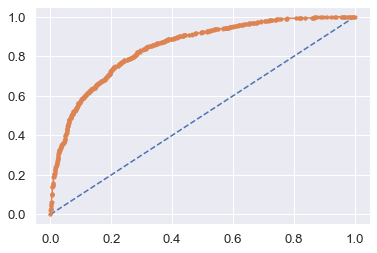

In [63]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.819


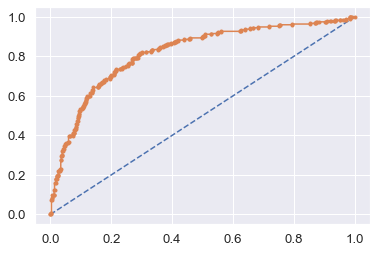

In [64]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## MLP Classifier (Artificial Neural Network)

In [65]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [66]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [67]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [68]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [69]:
best_grid = grid_search.best_estimator_

In [70]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

# Model Evaluation

## Confusion Matrix for the training data

In [71]:
confusion_matrix(train_labels,ytrain_predict)

array([[1255,  104],
       [ 384,  259]], dtype=int64)

In [72]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1359
           1       0.71      0.40      0.51       643

    accuracy                           0.76      2002
   macro avg       0.74      0.66      0.68      2002
weighted avg       0.75      0.76      0.73      2002



## Confusion Matrix for the test data

In [73]:
confusion_matrix(test_labels,ytest_predict)

array([[543,  45],
       [172,  99]], dtype=int64)

In [74]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       588
           1       0.69      0.37      0.48       271

    accuracy                           0.75       859
   macro avg       0.72      0.64      0.66       859
weighted avg       0.74      0.75      0.72       859



### AUC and ROC for the training data

AUC: 0.793


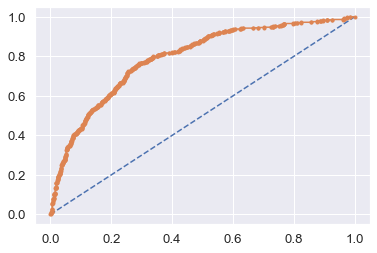

In [75]:
# predict probabilities
probs = grid_search.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.794


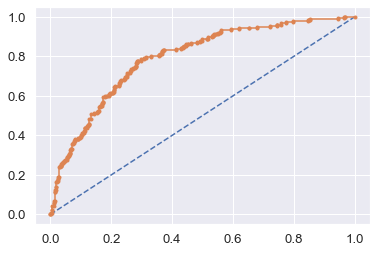

In [76]:
# AUC and ROC for the test data

# predict probabilities
probs = grid_search.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()